In [33]:
# imports pandas + matrplotlib and reads data into dataframe
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'ESIF_2014-2020_categorisation_ERDF-ESF-CF_planned_vs_implemented.csv')

# renames relevant columns to allow for the df.columnname.isin() command to be used
df.rename(columns = {'Dimension Type':'DimensionType', 'Dimension code':'Dimensioncode'}, inplace = True)

In [34]:
# first filter of the dataframe for relevant data from 2021
df = df[df.DimensionType == 'InterventionField']
df = df[df.Year == 2021]

# dimension codes represent projects in specific field
# f.e. 010 = "Renewable energy: solar,Renewable energy: solar"
# defines lists with dimension codes that represent the three pillars of the energy transition
codesLow = ['010','016','011','012','005','015','007','008','009','006']
codesHigh = ['039','044','036','035','042','040','041','043','024','025','026','027','090']
codesLowest = ['013','014','065','068','070','071','003']
# defines list with all energy transition dimensions
codesAll = codesLow + codesHigh + codesLowest

# filters dataframe for the two funds
Funds = ['CF','ERDF']
df = df[df.Fund.isin(Funds)]

# new dataframe with data from all pillars of the energy transition
dfAllFilters = df[df.Dimensioncode.isin(codesAll)]

# new dataframe for every pillar of the energy transition
dfLow = df[df.Dimensioncode.isin(codesLow)]
dfHigh = df[df.Dimensioncode.isin(codesHigh)]
dfLowest = df[df.Dimensioncode.isin(codesLowest)]

In [35]:
# defines new integers with the sum (from the dataframe) of the planned investment amount in 2021 for...
# ...all projects including non energy transition related projects:
GesamtWithOthers = df.EU_amount_planned.sum()

# ... every single one of the three pillars
OverallLow = dfLow.EU_amount_planned.sum()
OverallHigh = dfHigh.EU_amount_planned.sum()
OverallLowest = dfLowest.EU_amount_planned.sum()

# ... the sum of the investment into the three pillars
GesamtAll = dfAllFilters.EU_amount_planned.sum()

In [36]:
# calculates the percentage of the funding that goes towards...
# ... the energy transition:
PercentageEnergyTransition = GesamtAll / GesamtWithOthers * 100

# ... the pillars
PercentageLow = OverallLow / GesamtWithOthers * 100
PercentageHigh = OverallHigh / GesamtWithOthers * 100
PercentageLowest = OverallLowest / GesamtWithOthers * 100

# ... others than energy related investments
PercentageOthers = 100 - PercentageLowest - PercentageLow - PercentageHigh

# prints the percentages
print(PercentageEnergyTransition)
print(PercentageHigh)
print(PercentageLow)
print(PercentageLowest)

24.203648239773866
13.803148075867544
3.372894007186586
7.0276061567197345


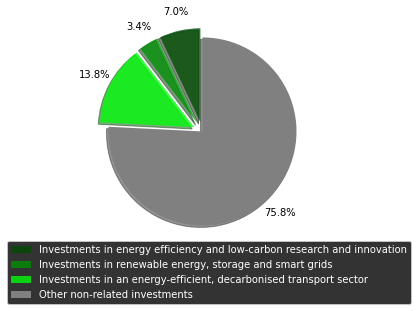

In [37]:
# draws a pie chart with the previously calculated data
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Investments in energy efficiency and low-carbon research and innovation', 'Investments in renewable energy, storage and smart grids', 'Investments in an energy-efficient, decarbonised transport sector', 'Other non-related investments'
sizes = [PercentageLowest, PercentageLow, PercentageHigh, PercentageOthers]
explode = (0.1, 0.1, 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=1.2,
        shadow=True, startangle=90, labeldistance=None, colors=['#014c03c7','#009205c7','#00ff08c7','grey'])
ax1.axis('equal')

ax1.legend(facecolor='black', labelcolor='white', bbox_to_anchor=(1.15, 0.))

plt.show()